<a href="https://colab.research.google.com/github/pandat8/topological_dynamics/blob/main/GP_Dynamics_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --no-deps CMGDB
!pip install --no-deps pychomp2
!pip install --upgrade --force-reinstall --no-deps git+https://github.com/marciogameiro/GP_MorseGraph.git
!pip install --no-deps paramz
!pip install --no-deps GPy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.6/813.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.6/180.6 kB 2.9 MB/s eta 0:00:00
  Cloning https://github.com/marciogameiro/GP_MorseGraph.git to /tmp/pip-req-build-4t3zj4ix
  Running command git clone --filter=blob:none --quiet https://github.com/marciogameiro/GP_MorseGraph.git /tmp/pip-req-build-4t3zj4ix
  Resolved https://github.com/marciogameiro/GP_MorseGraph.git to commit ea83af9c4588b0bb0570cef9df5715019ae1bb46
  Preparing metadata (setup.py) ... done
  Created wheel for GPDynamics: filename=GPDynamics-0.0.1-py3-none-any.whl size=4852 sha256=dcb7e8e364028ee528d95c7986062137d423c9f887f082e05ae928a874112683
  Stored in directory: /tmp/pip-ephem-wheel-cache-cyysmknn/wheels/a1/59/e3/d8c5ecce1582b43653d3f575f7cf1a482ebf9298314dcce603
Successfully built GPDynamics
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 22.2 MB/s et

In [ ]:
import CMGDB
import GPDynamics as GPD

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib
import numpy as np
import math

import GPy

In [ ]:
# Color list to plot Morse graph and Morse sets
clr_list = ['#0000ff77', '#fe010077', '#90d743', '#e8cb3288',
            '#0000ff77', '#fe010077', '#44015499', '#44398399', '#31688e99', '#fcad61',
            '#35b779', '#90d743', '#e8cb32', '#ffffb3', '#fccde5', '#ffed6f', '#0000ff77',
            '#fe010077', '#44015499', '#44398399', '#31688e99', '#fcad61', '#35b779',
            '#90d743', '#e8cb32', '#ffffb3', '#fccde5', '#ffed6f', '#0000ff77', '#fe010077',
            '#44015499', '#44398399', '#31688e99', '#fcad61', '#35b779', '#90d743', '#e8cb32',
            '#ffffb3', '#fccde5', '#ffed6f', '#0000ff77', '#fe010077', '#44015499', '#44398399',
            '#31688e99', '#fcad61', '#35b779', '#90d743', '#e8cb32', '#ffffb3', '#fccde5', '#ffed6f']

##Periodic orbit (period 2 orbit)

In [ ]:
confidence_level = 0.95
L = 8

################################################################################
# Periodic orbit (period 2 orbit)
################################################################################
phase_subdiv = 11
lower_bounds = [0.0]
upper_bounds = [1.0]

# Logistic map
def f(x):
    r = 3.15
    return [r * x[0] * (1.0 - x[0])]

X = [[0.8772321971841421], [0.5760207661939621], [0.4198079414354561], [0.3403959587666612]]


# Sample random points
# X0 = np.random.uniform(lower_bounds[0], upper_bounds[0], size=8)
# X = [[x] for x in X0]

In [ ]:
Y = [f(x) for x in X]

X = np.array(X)
Y = np.array(Y)

In [ ]:
# Add noise
# rng = np.random.RandomState(1)
# Y += rng.normal(0, 0.01, size=Y.shape)

In [ ]:
%%time
# Gaussian Process (GPy)
K = GPy.kern.RBF(1, 1.0, 2.0)
# Define model
m = GPy.models.GPRegression(X, Y, K, noise_var=0.1)
# m = GPy.models.GPRegression(X, Y, K, noise_var=1e-20)
m.optimize()

CPU times: user 59.3 ms, sys: 0 ns, total: 59.3 ms
Wall time: 60.8 ms


In [ ]:
# GPy 1D regressor
def g(X):
    # [y_pred], [sigma] = m.predict(np.array([[X[0], 0]]))
    [y_pred], [sigma] = m.predict_noiseless(np.array([[X[0], 0]]))
    return y_pred[0], sigma[0]**0.5

In [ ]:
m

GP_regression.,value,constraints,priors
rbf.variance,0.281152486583276,+ve,
rbf.lengthscale,0.4865502463437281,+ve,
Gaussian_noise.variance,1.7024367567821212e-12,+ve,


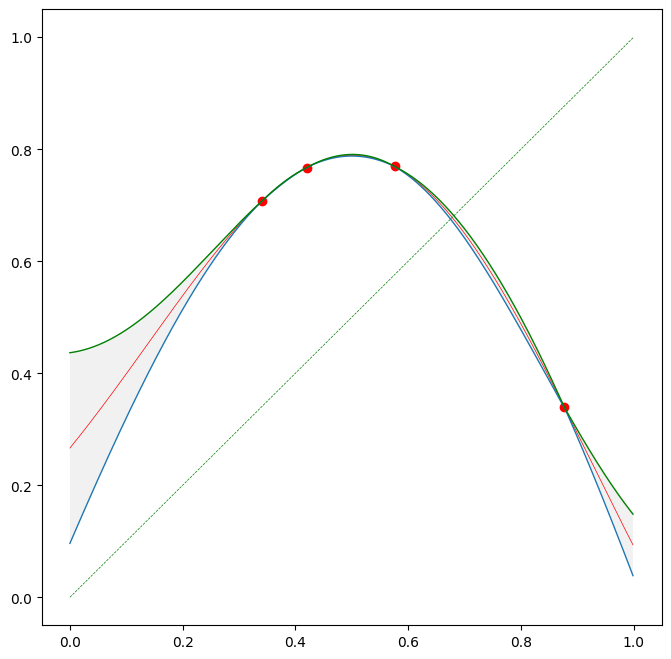

In [ ]:
# Plot true map and prediction wth confidence intervals
fig, ax = plt.subplots(figsize=(8, 8))

# Plot sample points
plt.plot(X, Y, 'ro')

# Plot Prediction map
t = np.arange(lower_bounds[0], upper_bounds[0], 0.001)
g_t = [(g([x])[0]) for x in t]
plt.plot(t, g_t, 'r', lw=0.5)

# Plot upper and lower bounds, and likelyhood
g_upper = [(g([x])[0]) + 2 * ((g([x])[1])) for x in t]
g_lower = [(g([x])[0]) - 2 * ((g([x])[1])) for x in t]
G_u = [k for k in g_upper]
g_l = [k for k in g_lower]
plt.plot(t, g_l, t, G_u, 'g', lw=1)
plt.fill_between(t, G_u, g_l, facecolor='lightgrey', alpha=0.3)

# Plot identity
plt.plot([lower_bounds[0], upper_bounds[0]], [lower_bounds[0], upper_bounds[0]], 'g--', lw = 0.5);

In [ ]:
# Construct the multi-valued map without using a Lispschitz constant
# morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level)

# Only give a message if the multi-valued map is out of bounds
morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level, L=L)

# Fail if the multi-valued map is out of bounds
# morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level, L=L, enforce_bounds=True)

# Skip Conley index computations
# morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level, L=L, compute_index=False)

Image of multi-valued map out of bounds.


In [ ]:
morse_graph.num_vertices()

4

In [ ]:
morse_graph.adjacencies(0)

[]

In [ ]:
morse_nodes = morse_graph.vertices()

for morse_node in morse_nodes:
    # Get Morse set for this Morse node
    morse_set = morse_graph.morse_set_boxes(morse_node)
    # Get intervals forming this Morse set
    intervals = GPD.get_intervals(morse_set)
    print(morse_node, ':', intervals)

0 : [[0.46875, 0.578125], [0.76416015625, 0.79638671875]]
1 : [[0.578125, 0.57861328125], [0.5791015625, 0.57958984375], [0.580078125, 0.58056640625], [0.5810546875, 0.58154296875], [0.58203125, 0.58251953125], [0.5830078125, 0.76220703125], [0.7626953125, 0.76318359375], [0.763671875, 0.76416015625]]
2 : [[0.0390625, 0.03955078125]]
3 : [[0.0, 0.03857421875]]


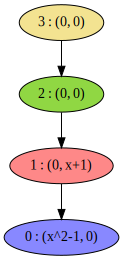

In [ ]:
num_morse_verts = len(morse_graph.vertices())
cmap = matplotlib.colors.ListedColormap(clr_list[:num_morse_verts], name='clr_list')

CMGDB.PlotMorseGraph(morse_graph, cmap=cmap)

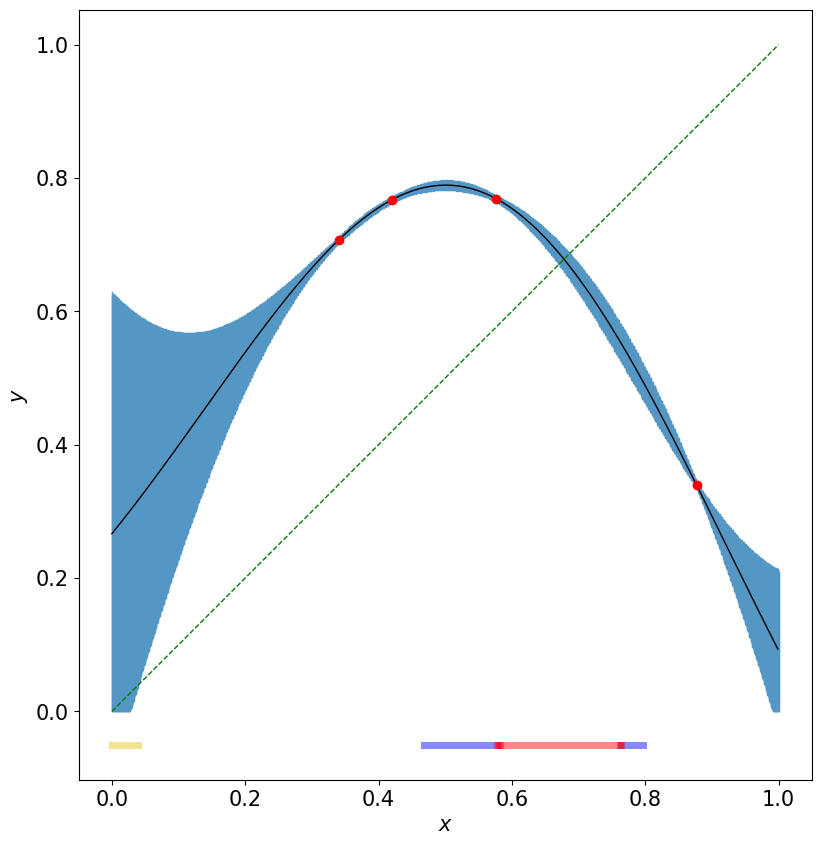

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.tick_params(labelsize=15)

# y value to plot Morse sets
y_morse_sets = - 0.05

num_verts = map_graph.num_vertices()

# Create lists of boxes
mv_x = []
mv_y = []
for a in range(num_verts):
    for b in map_graph.adjacencies(a):
        mv_x.append(morse_graph.phase_space_box(a))
        mv_y.append(morse_graph.phase_space_box(b))

# Plot multivalued map as a polygonal patch of rectangles
patches = []
for box_x, box_y in zip(mv_x, mv_y):
    # Vertices of the rectangle
    v0 = (box_x[0], box_y[0])
    v1 = (box_x[1], box_y[0])
    v2 = (box_x[1], box_y[1])
    v3 = (box_x[0], box_y[1])
    # Face of rectangle
    face = (v0, v1, v2, v3)
    # Plot face
    polygon = Polygon(face, closed=True)
    patches.append(polygon)

# Create patchs collections of Polygons (rectangles)
p2 = PatchCollection(patches, color='#5496c4')

# Add collections to the axis
ax.add_collection(p2)

# Auto scale axis
ax.autoscale_view()
# Set aspect ratio
ax.set_aspect(1)

# Plot Morse sets as lines
for morse_node in morse_graph.vertices():
    # Get Morse set for this Morse node
    morse_set = morse_graph.morse_set_boxes(morse_node)
    # morse_set = [box for box in morse_sets if box[2] == morse_node]
    intervals = GPD.get_intervals(morse_set)
    clr = clr_list[morse_node]
    # Plot intervals
    for interval in intervals:
        x_min, x_max = interval
        plt.plot([x_min, x_max], [y_morse_sets, y_morse_sets], '-', color=clr, lw=5.0)

# Plot identity
plt.plot([lower_bounds[0], upper_bounds[0]], [lower_bounds[0], upper_bounds[0]], 'g--', lw=1.0)

# Plot prediction map
t = np.arange(lower_bounds[0], upper_bounds[0], 0.001)
g_t = [(g([x])[0]) for x in t]
plt.plot(t, g_t, 'black', lw=1.0)

# Plot sample
plt.plot(X, Y, 'ro', markersize=6)

ax.set_xlabel(r'$x$', fontsize=15);
ax.set_ylabel(r'$y$', fontsize=15);

##Connecting orbit (period 4 orbit)

In [ ]:
confidence_level = 0.95
L = 8

###############################################################################
# Connecting orbit (period 4 orbit)
###############################################################################
phase_subdiv = 13
lower_bounds = [0.0]
upper_bounds = [1.0]

# Logistic map
def f(x):
    r = 3.5
    return [r * x[0] * (1.0 - x[0])]

X = [[0.9494034766906374], [0.269467499646053], [0.5895958512475645], [0.42380208144899933],
     [0.9349426774013843], [0.6361126382800876], [0.392159801473728], [0.531921174180595]]

In [ ]:
Y = [f(x) for x in X]

X = np.array(X)
Y = np.array(Y)

In [ ]:
%%time
# Gaussian Process (GPy)
K = GPy.kern.RBF(1, 1.0, 2.0)
# Define model
m = GPy.models.GPRegression(X, Y, K, noise_var=0.1)
# m = GPy.models.GPRegression(X, Y, K, noise_var=1e-20)
m.optimize()

CPU times: user 103 ms, sys: 1.06 ms, total: 104 ms
Wall time: 106 ms


In [ ]:
# GPy 1D regressor
def g(X):
    # [y_pred], [sigma] = m.predict(np.array([[X[0], 0]]))
    [y_pred], [sigma] = m.predict_noiseless(np.array([[X[0], 0]]))
    return y_pred[0], sigma[0]**0.5

In [ ]:
# Construct the multi-valued map without using a Lispschitz constant
# morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level)

# Only give a message if the multi-valued map is out of bounds
morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level, L=L)

# Fail if the multi-valued map is out of bounds
# morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level, L=L, enforce_bounds=True)

# Skip Conley index computations
# morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level, L=L, compute_index=False)

Image of multi-valued map out of bounds.


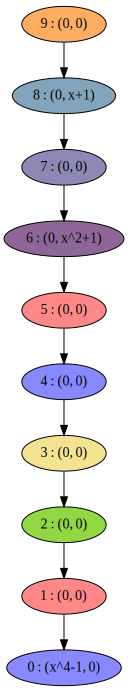

In [ ]:
num_morse_verts = len(morse_graph.vertices())
cmap = matplotlib.colors.ListedColormap(clr_list[:num_morse_verts], name='clr_list')

CMGDB.PlotMorseGraph(morse_graph, cmap=cmap)

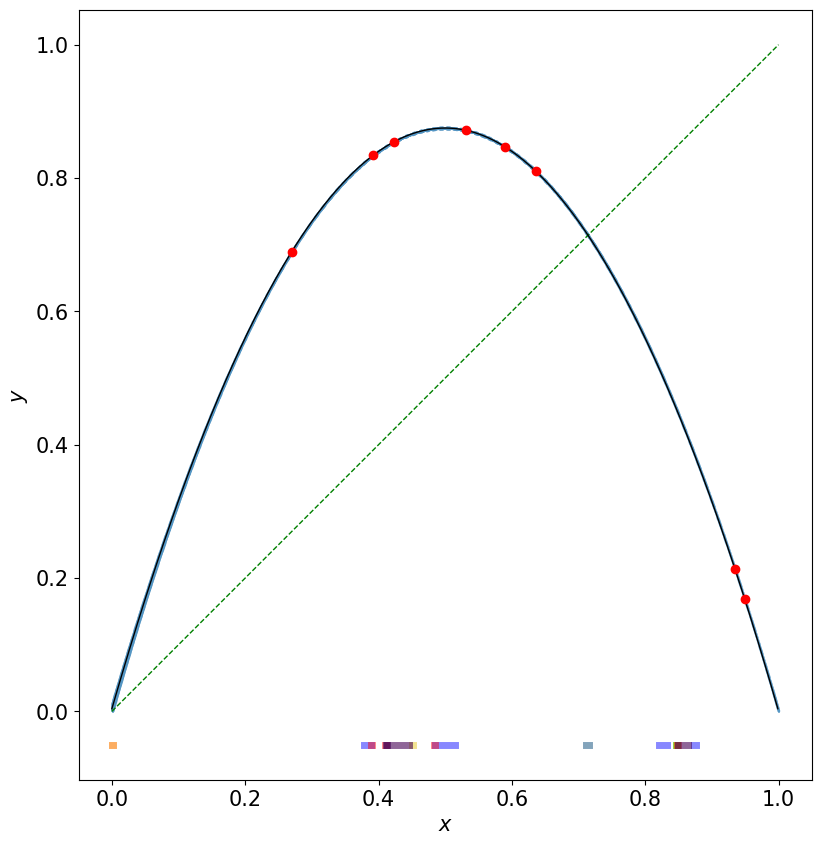

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.tick_params(labelsize=15)

# y value to plot Morse sets
y_morse_sets = - 0.05

num_verts = map_graph.num_vertices()

# Create lists of boxes
mv_x = []
mv_y = []
for a in range(num_verts):
    for b in map_graph.adjacencies(a):
        mv_x.append(morse_graph.phase_space_box(a))
        mv_y.append(morse_graph.phase_space_box(b))

# Plot multivalued map as a polygonal patch of rectangles
patches = []
for box_x, box_y in zip(mv_x, mv_y):
    # Vertices of the rectangle
    v0 = (box_x[0], box_y[0])
    v1 = (box_x[1], box_y[0])
    v2 = (box_x[1], box_y[1])
    v3 = (box_x[0], box_y[1])
    # Face of rectangle
    face = (v0, v1, v2, v3)
    # Plot face
    polygon = Polygon(face, closed=True)
    patches.append(polygon)

# Create patchs collections of Polygons (rectangles)
p2 = PatchCollection(patches, color='#5496c4')

# Add collections to the axis
ax.add_collection(p2)

# Auto scale axis
ax.autoscale_view()
# Set aspect ratio
ax.set_aspect(1)

# Plot Morse sets as lines
for morse_node in morse_graph.vertices():
    # Get Morse set for this Morse node
    morse_set = morse_graph.morse_set_boxes(morse_node)
    # morse_set = [box for box in morse_sets if box[2] == morse_node]
    intervals = GPD.get_intervals(morse_set)
    clr = clr_list[morse_node]
    # Plot intervals
    for interval in intervals:
        x_min, x_max = interval
        plt.plot([x_min, x_max], [y_morse_sets, y_morse_sets], '-', color=clr, lw=5.0)

# Plot identity
plt.plot([lower_bounds[0], upper_bounds[0]], [lower_bounds[0], upper_bounds[0]], 'g--', lw=1.0)

# Plot prediction map
t = np.arange(lower_bounds[0], upper_bounds[0], 0.001)
g_t = [(g([x])[0]) for x in t]
plt.plot(t, g_t, 'black', lw=1.0)

# Plot sample
plt.plot(X, Y, 'ro', markersize=6)

ax.set_xlabel(r'$x$', fontsize=15);
ax.set_ylabel(r'$y$', fontsize=15);

##Bistability

In [ ]:
confidence_level = 0.95
L = 8


###############################################################################
# Bistability
###############################################################################
phase_subdiv = 9
lower_bounds = [0.0]
upper_bounds = [1.0]

# Atan map
def f(x):
    return [0.3 * math.atan(8 * x[0] - 4) + 0.5]

X = [[0.859970977468584], [0.5111803970213599], [0.06909864350722794],
     [0.4101190807699333], [0.4594628230169513]]
X = [[0.859970977468584], [0.5111803970213599], [0.06909864350722794],
     [0.6602380233087406], [0.9614911004740687], [0.09522574849914789],
     [0.4101190807699333], [0.4594628230169513]]

# # Sample random points
# X0 = np.random.uniform(lower_bounds[0], upper_bounds[0], size=8)
# X = [[x] for x in X0]

In [ ]:
Y = [f(x) for x in X]

X = np.array(X)
Y = np.array(Y)

In [ ]:
%%time
# Gaussian Process (GPy)
K = GPy.kern.RBF(1, 1.0, 2.0)
# Define model
# m = GPy.models.GPRegression(X, Y, K, noise_var=0.1)
m = GPy.models.GPRegression(X, Y, K, noise_var=1e-20)
m.optimize()

CPU times: user 39.1 ms, sys: 1.11 ms, total: 40.2 ms
Wall time: 44.2 ms


In [ ]:
# GPy 1D regressor
def g(X):
    # [y_pred], [sigma] = m.predict(np.array([[X[0], 0]]))
    [y_pred], [sigma] = m.predict_noiseless(np.array([[X[0], 0]]))
    return y_pred[0], sigma[0]**0.5

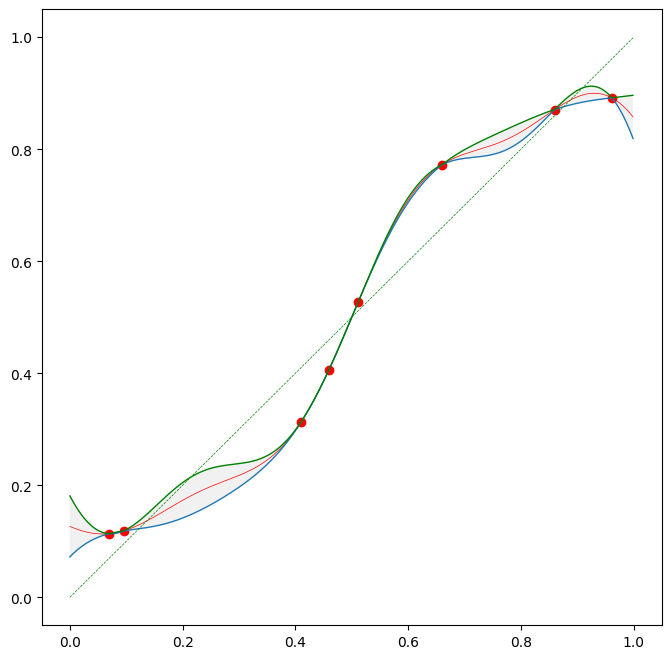

In [ ]:
# Plot true map and prediction wth confidence intervals
fig, ax = plt.subplots(figsize=(8, 8))

# Plot sample points
plt.plot(X, Y, 'ro')

# Plot Prediction map
t = np.arange(lower_bounds[0], upper_bounds[0], 0.001)
g_t = [(g([x])[0]) for x in t]
plt.plot(t, g_t, 'r', lw=0.5)

# Plot upper and lower bounds, and likelyhood
g_upper = [(g([x])[0]) + 2 * ((g([x])[1])) for x in t]
g_lower = [(g([x])[0]) - 2 * ((g([x])[1])) for x in t]
G_u = [k for k in g_upper]
g_l = [k for k in g_lower]
plt.plot(t, g_l, t, G_u, 'g', lw=1)
plt.fill_between(t, G_u, g_l, facecolor='lightgrey', alpha=0.3)

# Plot identity
plt.plot([lower_bounds[0], upper_bounds[0]], [lower_bounds[0], upper_bounds[0]], 'g--', lw = 0.5);

In [ ]:
# Construct the multi-valued map without using a Lispschitz constant
# morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level)

# Only give a message if the multi-valued map is out of bounds
morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level, L=L)

# Fail if the multi-valued map is out of bounds
# morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level, L=L, enforce_bounds=True)

# Skip Conley index computations
# morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level, L=L, compute_index=False)

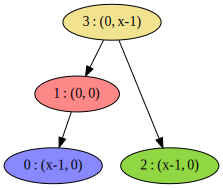

In [ ]:
num_morse_verts = len(morse_graph.vertices())
cmap = matplotlib.colors.ListedColormap(clr_list[:num_morse_verts], name='clr_list')

CMGDB.PlotMorseGraph(morse_graph, cmap=cmap)

##Chaos

In [ ]:
confidence_level = 0.95
L = 8


###############################################################################
# Chaos
###############################################################################
phase_subdiv = 10
lower_bounds = [-0.2]
upper_bounds = [2.3]

# lower_bounds = [-0.2]
# upper_bounds = [2.2]

# Exp map
def f(x):
    return [2 * math.exp(-5* (x[0] - 1) ** 2)]

X = [[1.8485834273635586], [1.471403107176174], [0.5689443404195422], [0.8473684698935612],
     [-0.04193971783574815], [1.7658138432304542], [1.7883544534390128], [0.5028298104351178],
     [-0.07239257127891435], [1.9799890654256767]]

In [ ]:
Y = [f(x) for x in X]

X = np.array(X)
Y = np.array(Y)

In [ ]:
%%time
# Gaussian Process (GPy)
K = GPy.kern.RBF(1, 1.0, 2.0)
# Define model
# m = GPy.models.GPRegression(X, Y, K, noise_var=0.1)
m = GPy.models.GPRegression(X, Y, K, noise_var=1e-20)
m.optimize()

CPU times: user 35.3 ms, sys: 0 ns, total: 35.3 ms
Wall time: 36.8 ms


In [ ]:
# GPy 1D regressor
def g(X):
    # [y_pred], [sigma] = m.predict(np.array([[X[0], 0]]))
    [y_pred], [sigma] = m.predict_noiseless(np.array([[X[0], 0]]))
    return y_pred[0], sigma[0]**0.5

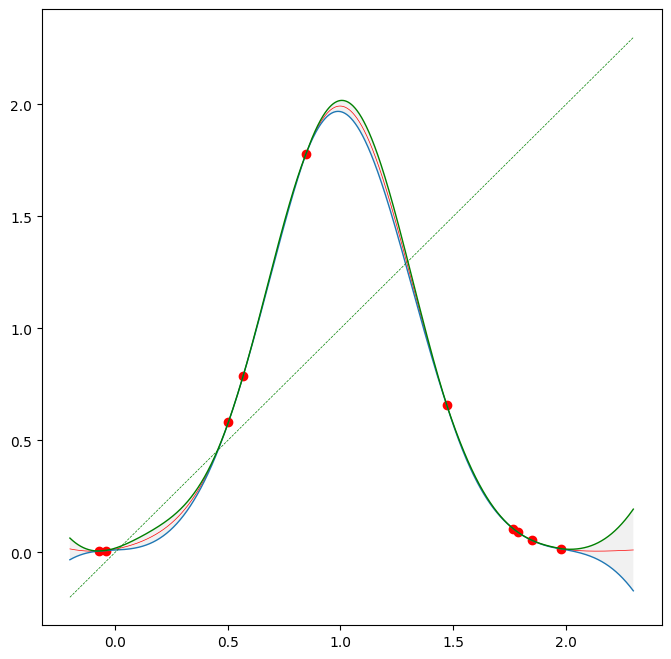

In [ ]:
# Plot true map and prediction wth confidence intervals
fig, ax = plt.subplots(figsize=(8, 8))

# Plot sample points
plt.plot(X, Y, 'ro')

# Plot Prediction map
t = np.arange(lower_bounds[0], upper_bounds[0], 0.001)
g_t = [(g([x])[0]) for x in t]
plt.plot(t, g_t, 'r', lw=0.5)

# Plot upper and lower bounds, and likelyhood
g_upper = [(g([x])[0]) + 2 * ((g([x])[1])) for x in t]
g_lower = [(g([x])[0]) - 2 * ((g([x])[1])) for x in t]
G_u = [k for k in g_upper]
g_l = [k for k in g_lower]
plt.plot(t, g_l, t, G_u, 'g', lw=1)
plt.fill_between(t, G_u, g_l, facecolor='lightgrey', alpha=0.3)

# Plot identity
plt.plot([lower_bounds[0], upper_bounds[0]], [lower_bounds[0], upper_bounds[0]], 'g--', lw = 0.5);

In [ ]:
# Construct the multi-valued map without using a Lispschitz constant
# morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level)

# Only give a message if the multi-valued map is out of bounds
morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level, L=L)

# Fail if the multi-valued map is out of bounds
# morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level, L=L, enforce_bounds=True)

# Skip Conley index computations
# morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level, L=L, compute_index=False)

Image of multi-valued map out of bounds.


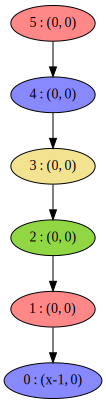

In [ ]:
num_morse_verts = len(morse_graph.vertices())
cmap = matplotlib.colors.ListedColormap(clr_list[:num_morse_verts], name='clr_list')

CMGDB.PlotMorseGraph(morse_graph, cmap=cmap)

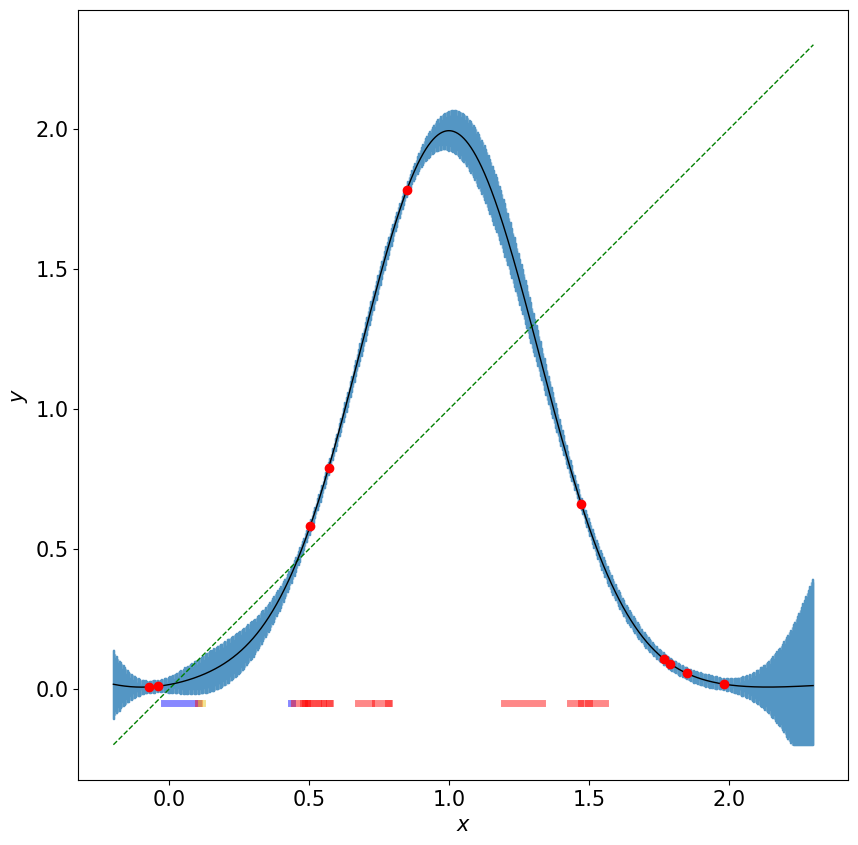

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.tick_params(labelsize=15)

# y value to plot Morse sets
y_morse_sets = - 0.05

num_verts = map_graph.num_vertices()

# Create lists of boxes
mv_x = []
mv_y = []
for a in range(num_verts):
    for b in map_graph.adjacencies(a):
        mv_x.append(morse_graph.phase_space_box(a))
        mv_y.append(morse_graph.phase_space_box(b))

# Plot multivalued map as a polygonal patch of rectangles
patches = []
for box_x, box_y in zip(mv_x, mv_y):
    # Vertices of the rectangle
    v0 = (box_x[0], box_y[0])
    v1 = (box_x[1], box_y[0])
    v2 = (box_x[1], box_y[1])
    v3 = (box_x[0], box_y[1])
    # Face of rectangle
    face = (v0, v1, v2, v3)
    # Plot face
    polygon = Polygon(face, closed=True)
    patches.append(polygon)

# Create patchs collections of Polygons (rectangles)
p2 = PatchCollection(patches, color='#5496c4')

# Add collections to the axis
ax.add_collection(p2)

# Auto scale axis
ax.autoscale_view()
# Set aspect ratio
ax.set_aspect(1)

# Plot Morse sets as lines
for morse_node in morse_graph.vertices():
    # Get Morse set for this Morse node
    morse_set = morse_graph.morse_set_boxes(morse_node)
    # morse_set = [box for box in morse_sets if box[2] == morse_node]
    intervals = GPD.get_intervals(morse_set)
    clr = clr_list[morse_node]
    # Plot intervals
    for interval in intervals:
        x_min, x_max = interval
        plt.plot([x_min, x_max], [y_morse_sets, y_morse_sets], '-', color=clr, lw=5.0)

# Plot identity
plt.plot([lower_bounds[0], upper_bounds[0]], [lower_bounds[0], upper_bounds[0]], 'g--', lw=1.0)

# Plot prediction map
t = np.arange(lower_bounds[0], upper_bounds[0], 0.001)
g_t = [(g([x])[0]) for x in t]
plt.plot(t, g_t, 'black', lw=1.0)

# Plot sample
plt.plot(X, Y, 'ro', markersize=6)

ax.set_xlabel(r'$x$', fontsize=15);
ax.set_ylabel(r'$y$', fontsize=15);

##Ricker model (discrete time population model)


###Predicted mean approach

Using just the predicted mean gives us incorrect dynamics

In [ ]:
confidence_level = 0.01
L = 7


###############################################################################
# Ricker model
###############################################################################
phase_subdiv = 9
lower_bounds = [0.0]
upper_bounds = [2.5]

# Define the function to calculate N_t+1
def N_next(N_t, r, k):
    # t: time, N_t: Population at t, K: Carrying capacity, r: Growth rate
    return N_t * np.exp(r * (1 - N_t / k))

X = [[0], [0.15], [0.25], [0.33], [0.5], [1], [1.3], [1.5], [1.7], [2], [2.2], [2.3]]

def f(x):
    return [N_next(x[0], 2.5, 1)]

In [ ]:
Y = [f(x) for x in X]

X = np.array(X)
Y = np.array(Y)

In [ ]:
%%time
# Gaussian Process (GPy)
K = GPy.kern.RBF(1, 1.0, 1.0)
# + GPy.kern.White(input_dim=1, variance=0.0001)
# Define model
# m = GPy.models.GPRegression(X, Y, K, noise_var=0.00001)
m = GPy.models.GPRegression(X, Y, K, noise_var=1e-20)
m.optimize()

CPU times: user 33 ms, sys: 902 µs, total: 33.9 ms
Wall time: 41.4 ms


In [ ]:
# GPy 1D regressor
def g(X):
    [y_pred], [sigma] = m.predict(np.array([[X[0], 0]]))
    # [y_pred], [sigma] = m.predict_noiseless(np.array([[X[0], 0]]))
    return y_pred[0], sigma[0]**0.5

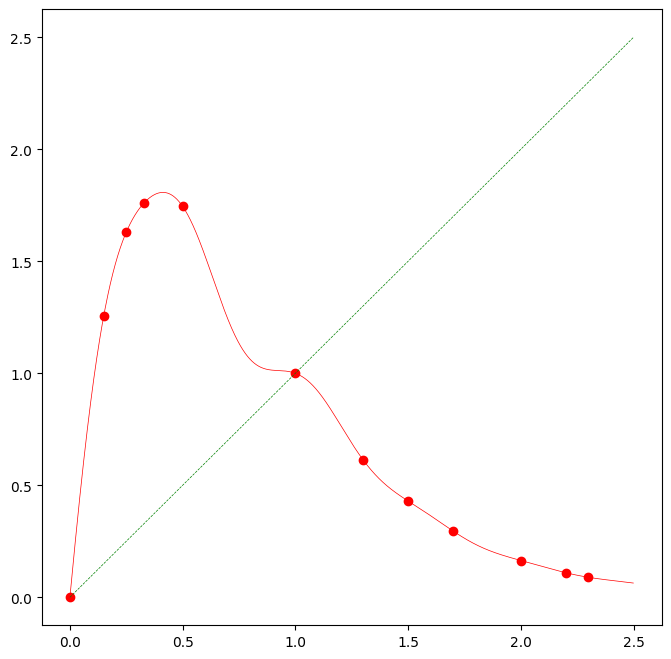

In [ ]:
# Plot true map and prediction wth confidence intervals
fig, ax = plt.subplots(figsize=(8, 8))

# Plot sample points
plt.plot(X, Y, 'ro')

# Plot Prediction map
t = np.arange(lower_bounds[0], upper_bounds[0], 0.001)
g_t = [(g([x])[0]) for x in t]
plt.plot(t, g_t, 'r', lw=0.5)

# # Plot upper and lower bounds, and likelyhood
# g_upper = [(g([x])[0]) + 2 * ((g([x])[1])) for x in t]
# g_lower = [(g([x])[0]) - 2 * ((g([x])[1])) for x in t]
# G_u = [k for k in g_upper]
# g_l = [k for k in g_lower]
# plt.plot(t, g_l, t, G_u, 'g', lw=1)
# plt.fill_between(t, G_u, g_l, facecolor='lightgrey', alpha=0.3)

# Plot identity
plt.plot([lower_bounds[0], upper_bounds[0]], [lower_bounds[0], upper_bounds[0]], 'g--', lw = 0.5);

In [ ]:
# Construct the multi-valued map without using a Lispschitz constant
morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level)

# Only give a message if the multi-valued map is out of bounds
# morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level, L=L)

# Fail if the multi-valued map is out of bounds
# morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level, L=L, enforce_bounds=True)

# Skip Conley index computations
# morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level, L=L, compute_index=False)

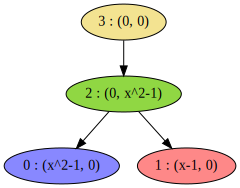

In [ ]:
num_morse_verts = len(morse_graph.vertices())
cmap = matplotlib.colors.ListedColormap(clr_list[:num_morse_verts], name='clr_list')

CMGDB.PlotMorseGraph(morse_graph, cmap=cmap)

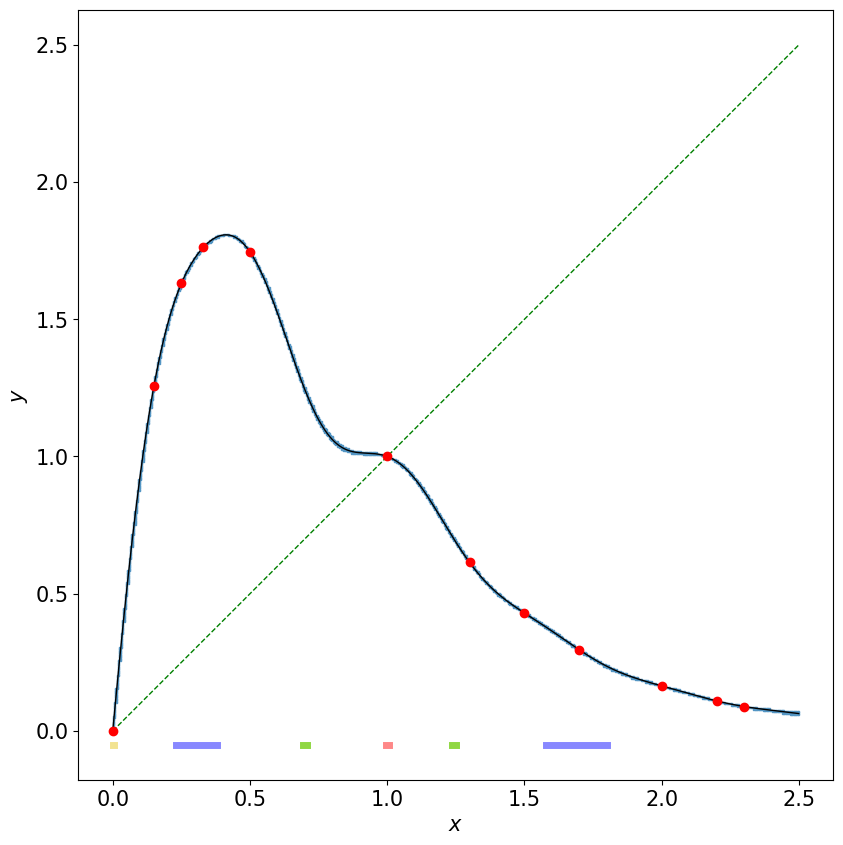

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.tick_params(labelsize=15)

# y value to plot Morse sets
y_morse_sets = - 0.05

num_verts = map_graph.num_vertices()

# Create lists of boxes
mv_x = []
mv_y = []
for a in range(num_verts):
    for b in map_graph.adjacencies(a):
        mv_x.append(morse_graph.phase_space_box(a))
        mv_y.append(morse_graph.phase_space_box(b))

# Plot multivalued map as a polygonal patch of rectangles
patches = []
for box_x, box_y in zip(mv_x, mv_y):
    # Vertices of the rectangle
    v0 = (box_x[0], box_y[0])
    v1 = (box_x[1], box_y[0])
    v2 = (box_x[1], box_y[1])
    v3 = (box_x[0], box_y[1])
    # Face of rectangle
    face = (v0, v1, v2, v3)
    # Plot face
    polygon = Polygon(face, closed=True)
    patches.append(polygon)

# Create patchs collections of Polygons (rectangles)
p2 = PatchCollection(patches, color='#5496c4')

# Add collections to the axis
ax.add_collection(p2)

# Auto scale axis
ax.autoscale_view()
# Set aspect ratio
ax.set_aspect(1)

# Plot Morse sets as lines
for morse_node in morse_graph.vertices():
    # Get Morse set for this Morse node
    morse_set = morse_graph.morse_set_boxes(morse_node)
    # morse_set = [box for box in morse_sets if box[2] == morse_node]
    intervals = GPD.get_intervals(morse_set)
    clr = clr_list[morse_node]
    # Plot intervals
    for interval in intervals:
        x_min, x_max = interval
        plt.plot([x_min, x_max], [y_morse_sets, y_morse_sets], '-', color=clr, lw=5.0)

# Plot identity
plt.plot([lower_bounds[0], upper_bounds[0]], [lower_bounds[0], upper_bounds[0]], 'g--', lw=1.0)

# Plot prediction map
t = np.arange(lower_bounds[0], upper_bounds[0], 0.001)
g_t = [(g([x])[0]) for x in t]
plt.plot(t, g_t, 'black', lw=1.0)

# Plot sample
plt.plot(X, Y, 'ro', markersize=6)

ax.set_xlabel(r'$x$', fontsize=15);
ax.set_ylabel(r'$y$', fontsize=15);

###Confidence_level = 0.95
Global attractor, correct dynamics

In [ ]:
confidence_level = 0.95
L = 7


###############################################################################
# Ricker model
###############################################################################
phase_subdiv = 9
lower_bounds = [0.0]
upper_bounds = [2.5]

# Define the function to calculate N_t+1
def N_next(N_t, r, k):
    # t: time, N_t: Population at t, K: Carrying capacity, r: Growth rate
    return N_t * np.exp(r * (1 - N_t / k))

X = [[0], [0.15], [0.25], [0.33], [0.5], [1], [1.3], [1.5], [1.7], [2], [2.22], [2.3]]

def f(x):
    return [N_next(x[0], 2.5, 1)]

In [ ]:
Y = [f(x) for x in X]

X = np.array(X)
Y = np.array(Y)

In [ ]:
%%time
# Gaussian Process (GPy)
K = GPy.kern.RBF(1, 1.0, 1.0)
# + GPy.kern.White(input_dim=1, variance=0.0001)
# Define model
# m = GPy.models.GPRegression(X, Y, K, noise_var=0.00001)
m = GPy.models.GPRegression(X, Y, K, noise_var=1e-20)
m.optimize()

CPU times: user 24.9 ms, sys: 0 ns, total: 24.9 ms
Wall time: 25.5 ms


In [ ]:
# GPy 1D regressor
def g(X):
    [y_pred], [sigma] = m.predict(np.array([[X[0], 0]]))
    # [y_pred], [sigma] = m.predict_noiseless(np.array([[X[0], 0]]))
    return y_pred[0], sigma[0]**0.5

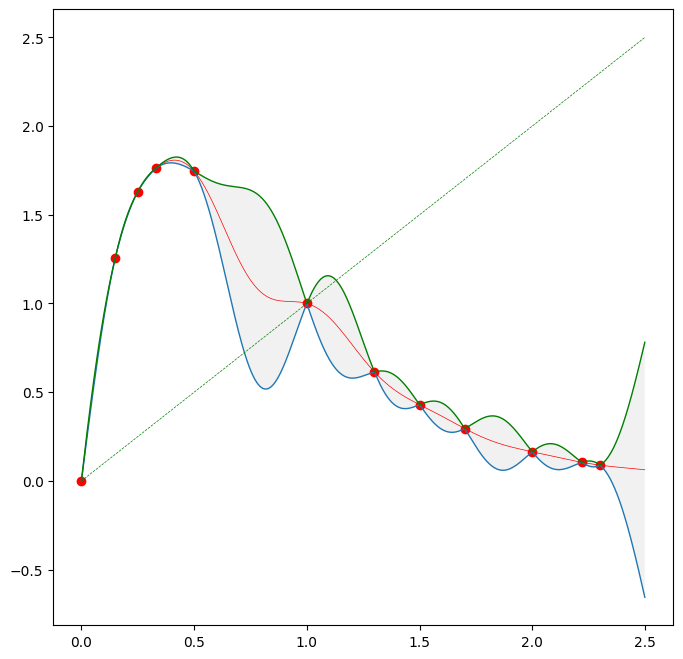

In [ ]:
# Plot true map and prediction wth confidence intervals
fig, ax = plt.subplots(figsize=(8, 8))

# Plot sample points
plt.plot(X, Y, 'ro')

# Plot Prediction map
t = np.arange(lower_bounds[0], upper_bounds[0], 0.001)
g_t = [(g([x])[0]) for x in t]
plt.plot(t, g_t, 'r', lw=0.5)

# Plot upper and lower bounds, and likelyhood
g_upper = [(g([x])[0]) + 2 * ((g([x])[1])) for x in t]
g_lower = [(g([x])[0]) - 2 * ((g([x])[1])) for x in t]
G_u = [k for k in g_upper]
g_l = [k for k in g_lower]
plt.plot(t, g_l, t, G_u, 'g', lw=1)
plt.fill_between(t, G_u, g_l, facecolor='lightgrey', alpha=0.3)

# Plot identity
plt.plot([lower_bounds[0], upper_bounds[0]], [lower_bounds[0], upper_bounds[0]], 'g--', lw = 0.5);

In [ ]:
# Construct the multi-valued map without using a Lispschitz constant
morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level)

# Only give a message if the multi-valued map is out of bounds
# morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level, L=L)

# Fail if the multi-valued map is out of bounds
# morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level, L=L, enforce_bounds=True)

# Skip Conley index computations
# morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level, L=L, compute_index=False)

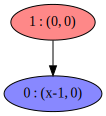

In [ ]:
num_morse_verts = len(morse_graph.vertices())
cmap = matplotlib.colors.ListedColormap(clr_list[:num_morse_verts], name='clr_list')

CMGDB.PlotMorseGraph(morse_graph, cmap=cmap)

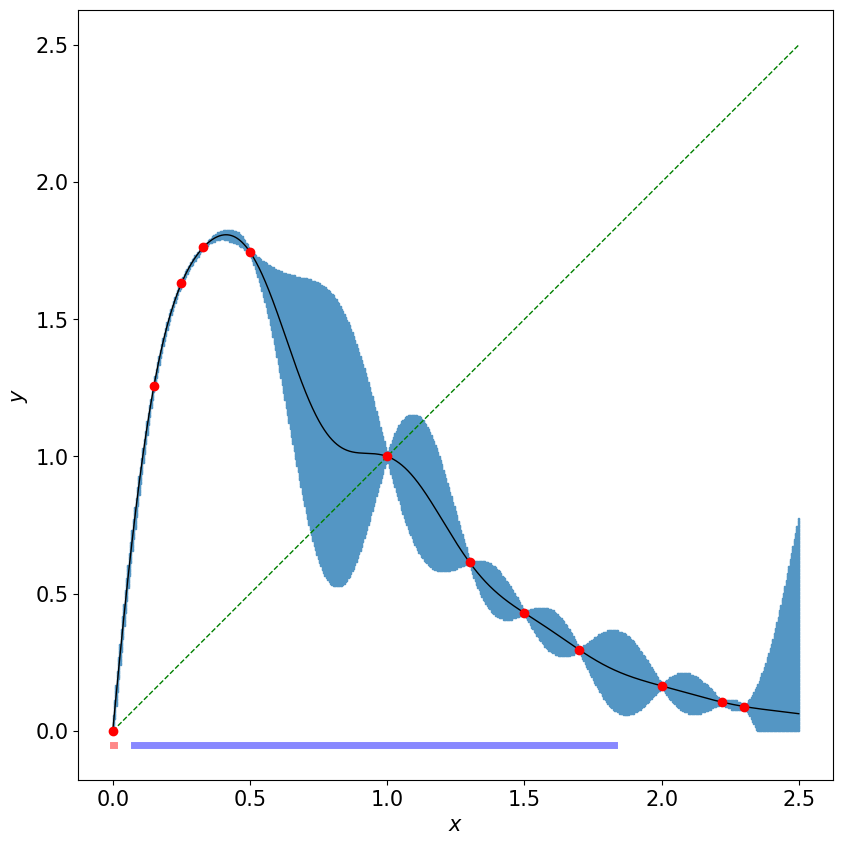

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.tick_params(labelsize=15)

# y value to plot Morse sets
y_morse_sets = - 0.05

num_verts = map_graph.num_vertices()

# Create lists of boxes
mv_x = []
mv_y = []
for a in range(num_verts):
    for b in map_graph.adjacencies(a):
        mv_x.append(morse_graph.phase_space_box(a))
        mv_y.append(morse_graph.phase_space_box(b))

# Plot multivalued map as a polygonal patch of rectangles
patches = []
for box_x, box_y in zip(mv_x, mv_y):
    # Vertices of the rectangle
    v0 = (box_x[0], box_y[0])
    v1 = (box_x[1], box_y[0])
    v2 = (box_x[1], box_y[1])
    v3 = (box_x[0], box_y[1])
    # Face of rectangle
    face = (v0, v1, v2, v3)
    # Plot face
    polygon = Polygon(face, closed=True)
    patches.append(polygon)

# Create patchs collections of Polygons (rectangles)
p2 = PatchCollection(patches, color='#5496c4')

# Add collections to the axis
ax.add_collection(p2)

# Auto scale axis
ax.autoscale_view()
# Set aspect ratio
ax.set_aspect(1)

# Plot Morse sets as lines
for morse_node in morse_graph.vertices():
    # Get Morse set for this Morse node
    morse_set = morse_graph.morse_set_boxes(morse_node)
    # morse_set = [box for box in morse_sets if box[2] == morse_node]
    intervals = GPD.get_intervals(morse_set)
    clr = clr_list[morse_node]
    # Plot intervals
    for interval in intervals:
        x_min, x_max = interval
        plt.plot([x_min, x_max], [y_morse_sets, y_morse_sets], '-', color=clr, lw=5.0)

# Plot identity
plt.plot([lower_bounds[0], upper_bounds[0]], [lower_bounds[0], upper_bounds[0]], 'g--', lw=1.0)

# Plot prediction map
t = np.arange(lower_bounds[0], upper_bounds[0], 0.001)
g_t = [(g([x])[0]) for x in t]
plt.plot(t, g_t, 'black', lw=1.0)

# Plot sample
plt.plot(X, Y, 'ro', markersize=6)

ax.set_xlabel(r'$x$', fontsize=15);
ax.set_ylabel(r'$y$', fontsize=15);

###Ricker model (discrete time population model) confidence_level = 0.95
Adding more points to obtain the known dynamics of the model (one attractor which is a periodic orbit of period 2)

In [ ]:
confidence_level = 0.95
L = 7


###############################################################################
# Ricker model
###############################################################################
phase_subdiv = 9
lower_bounds = [0.0]
upper_bounds = [2.5]

# Define the function to calculate N_t+1
def N_next(N_t, r, k):
    # t: time, N_t: Population at t, K: Carrying capacity, r: Growth rate
    return N_t * np.exp(r * (1 - N_t / k))

X = [[0], [0.15], [0.25], [0.33], [0.5], [0.7], [1], [1.3], [1.5], [1.7], [2], [2.2], [2.3]]

def f(x):
    return [N_next(x[0], 2.5, 1)]

In [ ]:
Y = [f(x) for x in X]

X = np.array(X)
Y = np.array(Y)

In [ ]:
%%time
# Gaussian Process (GPy)
K = GPy.kern.RBF(1, 1.0, 1.0)
# + GPy.kern.White(input_dim=1, variance=0.0001)
# Define model
# m = GPy.models.GPRegression(X, Y, K, noise_var=0.00001)
m = GPy.models.GPRegression(X, Y, K, noise_var=1e-20)
m.optimize()

CPU times: user 34.6 ms, sys: 0 ns, total: 34.6 ms
Wall time: 40.2 ms


In [ ]:
# GPy 1D regressor
def g(X):
    [y_pred], [sigma] = m.predict(np.array([[X[0], 0]]))
    # [y_pred], [sigma] = m.predict_noiseless(np.array([[X[0], 0]]))
    return y_pred[0], sigma[0]**0.5

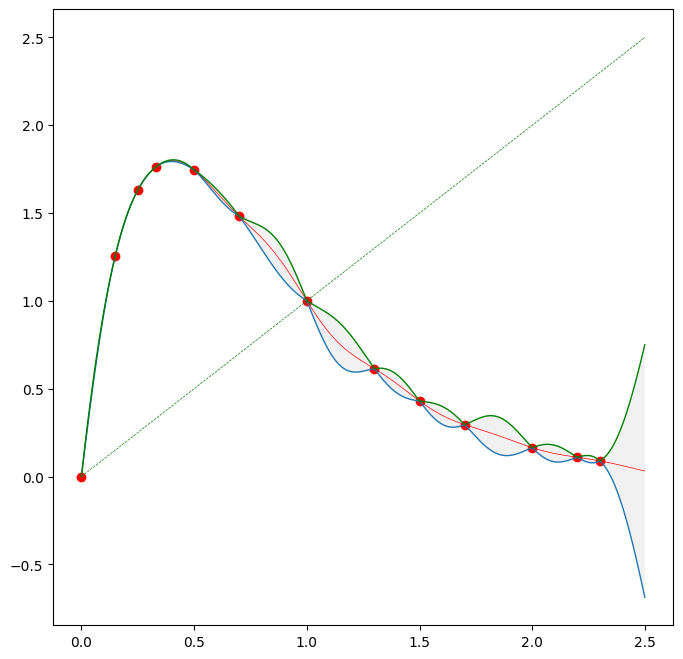

In [ ]:
# Plot true map and prediction wth confidence intervals
fig, ax = plt.subplots(figsize=(8, 8))

# Plot sample points
plt.plot(X, Y, 'ro')

# Plot Prediction map
t = np.arange(lower_bounds[0], upper_bounds[0], 0.001)
g_t = [(g([x])[0]) for x in t]
plt.plot(t, g_t, 'r', lw=0.5)

# Plot upper and lower bounds, and likelyhood
g_upper = [(g([x])[0]) + 2 * ((g([x])[1])) for x in t]
g_lower = [(g([x])[0]) - 2 * ((g([x])[1])) for x in t]
G_u = [k for k in g_upper]
g_l = [k for k in g_lower]
plt.plot(t, g_l, t, G_u, 'g', lw=1)
plt.fill_between(t, G_u, g_l, facecolor='lightgrey', alpha=0.3)

# Plot identity
plt.plot([lower_bounds[0], upper_bounds[0]], [lower_bounds[0], upper_bounds[0]], 'g--', lw = 0.5);

In [ ]:
# Construct the multi-valued map without using a Lispschitz constant
morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level)

# Only give a message if the multi-valued map is out of bounds
# morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level, L=L)

# Fail if the multi-valued map is out of bounds
# morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level, L=L, enforce_bounds=True)

# Skip Conley index computations
# morse_graph, map_graph = GPD.ConleyMorseGraph(phase_subdiv, lower_bounds, upper_bounds, g, confidence_level, L=L, compute_index=False)

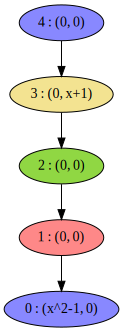

In [ ]:
num_morse_verts = len(morse_graph.vertices())
cmap = matplotlib.colors.ListedColormap(clr_list[:num_morse_verts], name='clr_list')

CMGDB.PlotMorseGraph(morse_graph, cmap=cmap)

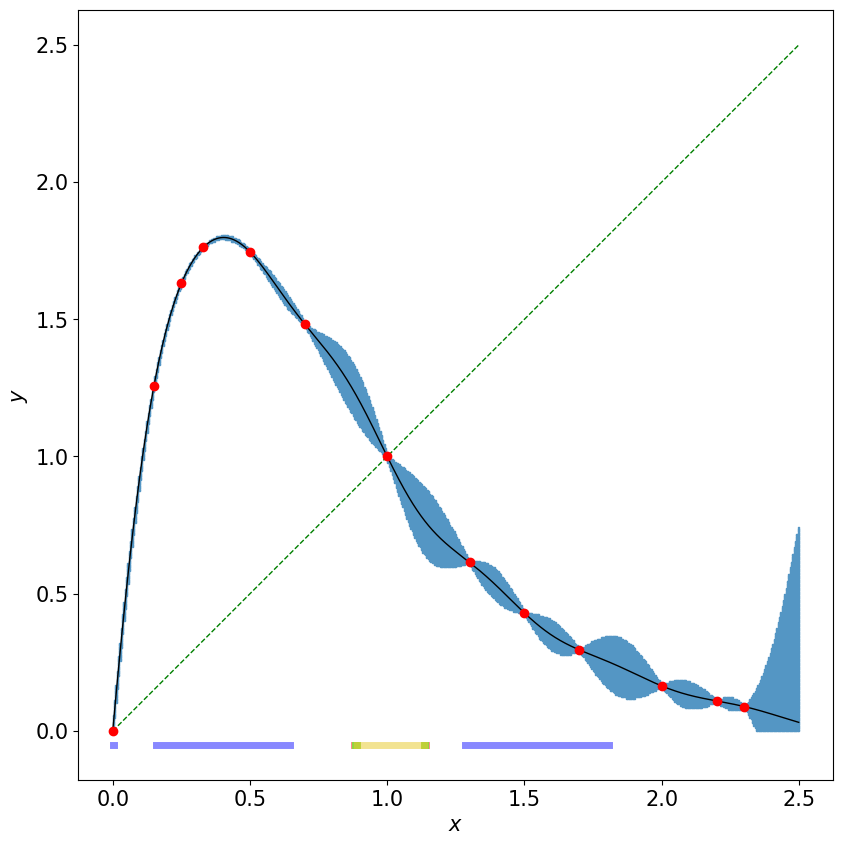

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.tick_params(labelsize=15)

# y value to plot Morse sets
y_morse_sets = - 0.05

num_verts = map_graph.num_vertices()

# Create lists of boxes
mv_x = []
mv_y = []
for a in range(num_verts):
    for b in map_graph.adjacencies(a):
        mv_x.append(morse_graph.phase_space_box(a))
        mv_y.append(morse_graph.phase_space_box(b))

# Plot multivalued map as a polygonal patch of rectangles
patches = []
for box_x, box_y in zip(mv_x, mv_y):
    # Vertices of the rectangle
    v0 = (box_x[0], box_y[0])
    v1 = (box_x[1], box_y[0])
    v2 = (box_x[1], box_y[1])
    v3 = (box_x[0], box_y[1])
    # Face of rectangle
    face = (v0, v1, v2, v3)
    # Plot face
    polygon = Polygon(face, closed=True)
    patches.append(polygon)

# Create patchs collections of Polygons (rectangles)
p2 = PatchCollection(patches, color='#5496c4')

# Add collections to the axis
ax.add_collection(p2)

# Auto scale axis
ax.autoscale_view()
# Set aspect ratio
ax.set_aspect(1)

# Plot Morse sets as lines
for morse_node in morse_graph.vertices():
    # Get Morse set for this Morse node
    morse_set = morse_graph.morse_set_boxes(morse_node)
    # morse_set = [box for box in morse_sets if box[2] == morse_node]
    intervals = GPD.get_intervals(morse_set)
    clr = clr_list[morse_node]
    # Plot intervals
    for interval in intervals:
        x_min, x_max = interval
        plt.plot([x_min, x_max], [y_morse_sets, y_morse_sets], '-', color=clr, lw=5.0)

# Plot identity
plt.plot([lower_bounds[0], upper_bounds[0]], [lower_bounds[0], upper_bounds[0]], 'g--', lw=1.0)

# Plot prediction map
t = np.arange(lower_bounds[0], upper_bounds[0], 0.001)
g_t = [(g([x])[0]) for x in t]
plt.plot(t, g_t, 'black', lw=1.0)

# Plot sample
plt.plot(X, Y, 'ro', markersize=6)

ax.set_xlabel(r'$x$', fontsize=15);
ax.set_ylabel(r'$y$', fontsize=15);